# Script analyse descriptive des données CORVEN CHIFFOLEAU 

In [1]:
! pip install --upgrade plotly

In [3]:
#General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image

### Analyse descriptive et préparation des données

In [4]:
folder_test=".../data_test/"
test_data=".../test.tsv"
train_data="...t/train-00000-of-00005.tsv"

In [5]:
files_test = os.listdir(folder_test)
for names in files_test :
    print(names)

NameError: name 'os' is not defined

In [111]:
train = pd.read_csv(train_data, sep="\t", nrows=100000, engine="python")
train.head()

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description,caption_title_and_reference_description
0,fr,https://fr.wikipedia.org/wiki/Pariser_Kanonen,https://upload.wikimedia.org/wikipedia/commons...,Pariser Kanonen,Bilan,Pariser Kanonen / Bilan,NaN,Français&#160;: Plaque apposée au n° 81 du bou...,NaN,image/jpeg,1279,1812,False,True,True,Les Pariser Kanonen sont sept pièces d’artille...,Le ou les canons restants sont démontés devant...,Pariser Kanonen [SEP]
1,tg,https://tg.wikipedia.org/wiki/Republic_P-43_La...,http://upload.wikimedia.org/wikipedia/commons/...,Republic P-43 Lancer,NaN,Republic P-43 Lancer,NaN,A Republic P-43 Lancer in flight over Esler Fi...,NaN,image/jpeg,306,591,True,False,False,Republic P-43 Lancer — як ҳавогарди сохтаи Rep...,Republic P-43 Lancer (англ. Republic P-43 Lanc...,Republic P-43 Lancer [SEP]
2,en,"https://en.wikipedia.org/wiki/Deer_Park,_Wisco...",https://upload.wikimedia.org/wikipedia/commons...,"Deer Park, Wisconsin",NaN,"Deer Park, Wisconsin",Downtown Deer Park,"English: Downtown Deer Park, Wisconsin on WIS46.",Downtown Deer Park,image/jpeg,1824,2736,True,True,True,"Deer Park is a village in St. Croix County, Wi...","Deer Park is a village in St. Croix County, Wi...","Deer Park, Wisconsin [SEP] Downtown Deer Park"
3,pt,https://pt.wikipedia.org/wiki/Vaux-l%C3%A8s-Mo...,https://upload.wikimedia.org/wikipedia/commons...,Vaux-lès-Mouzon,NaN,Vaux-lès-Mouzon,NaN,Français&#160;: Vaux-lès-Mouzon&#160;: le village,NaN,image/jpeg,1704,2272,True,False,False,Vaux-lès-Mouzon é uma comuna francesa na regiã...,Vaux-lès-Mouzon é uma comuna francesa na regiã...,Vaux-lès-Mouzon [SEP]
4,ne,https://ne.wikipedia.org/wiki/%E0%A4%95%E0%A5%...,https://upload.wikimedia.org/wikipedia/commons...,क्रिसमस टापु,NaN,क्रिसमस टापु,NaN,This is a locator map for Christmas Island I m...,NaN,image/png,165,248,True,False,False,क्रिसमस टापु हिन्द महासागरमा अवस्थित अष्ट्रेलि...,क्रिसमस टापु हिन्द महासागरमा अवस्थित अष्ट्रेलि...,क्रिसमस टापु [SEP]


In [112]:
test = pd.read_csv(test_data, sep="\t", nrows=100000, engine="python")
test.head()

,id,image_url
0,0,https://upload.wikimedia.org/wikipedia/commons...
1,1,https://upload.wikimedia.org/wikipedia/commons...
2,2,https://upload.wikimedia.org/wikipedia/commons...
3,3,https://upload.wikimedia.org/wikipedia/commons...
4,4,https://upload.wikimedia.org/wikipedia/commons...


In [113]:
print(train.dtypes)

language                                   object
page_url                                   object
image_url                                  object
page_title                                 object
section_title                              object
hierarchical_section_title                 object
caption_reference_description              object
caption_attribution_description            object
caption_alt_text_description               object
mime_type                                  object
original_height                             int64
original_width                              int64
is_main_image                                bool
attribution_passes_lang_id                   bool
page_changed_recently                        bool
context_page_description                   object
context_section_description                object
caption_title_and_reference_description    object
dtype: object


In [114]:
train.describe()

,original_height,original_width
count,100000.00000,100000.00000
mean,1547.06633,1825.58770
std,1182.66929,1477.39766
min,100.00000,100.00000
25%,600.00000,664.00000
50%,1200.00000,1368.00000
75%,2304.00000,2610.00000
max,23832.00000,40839.00000


In [115]:
train.shape

(100000, 18)

In [116]:
check_for_nan = train.isnull().values.any()
print(check_for_nan)

True


In [117]:
train.isnull().sum().sort_values(ascending = False)

caption_alt_text_description               85501
caption_reference_description              54596
section_title                              51996
context_section_description                16156
caption_attribution_description             6136
language                                     407
context_page_description                     103
hierarchical_section_title                     3
is_main_image                                  0
page_changed_recently                          0
attribution_passes_lang_id                     0
mime_type                                      0
original_width                                 0
original_height                                0
page_url                                       0
page_title                                     0
image_url                                      0
caption_title_and_reference_description        0
dtype: int64

In [118]:
train.isna().sum()/train.shape[0]*100

language                                    0.407
page_url                                    0.000
image_url                                   0.000
page_title                                  0.000
section_title                              51.996
hierarchical_section_title                  0.003
caption_reference_description              54.596
caption_attribution_description             6.136
caption_alt_text_description               85.501
mime_type                                   0.000
original_height                             0.000
original_width                              0.000
is_main_image                               0.000
attribution_passes_lang_id                  0.000
page_changed_recently                       0.000
context_page_description                    0.103
context_section_description                16.156
caption_title_and_reference_description     0.000
dtype: float64

<AxesSubplot:>

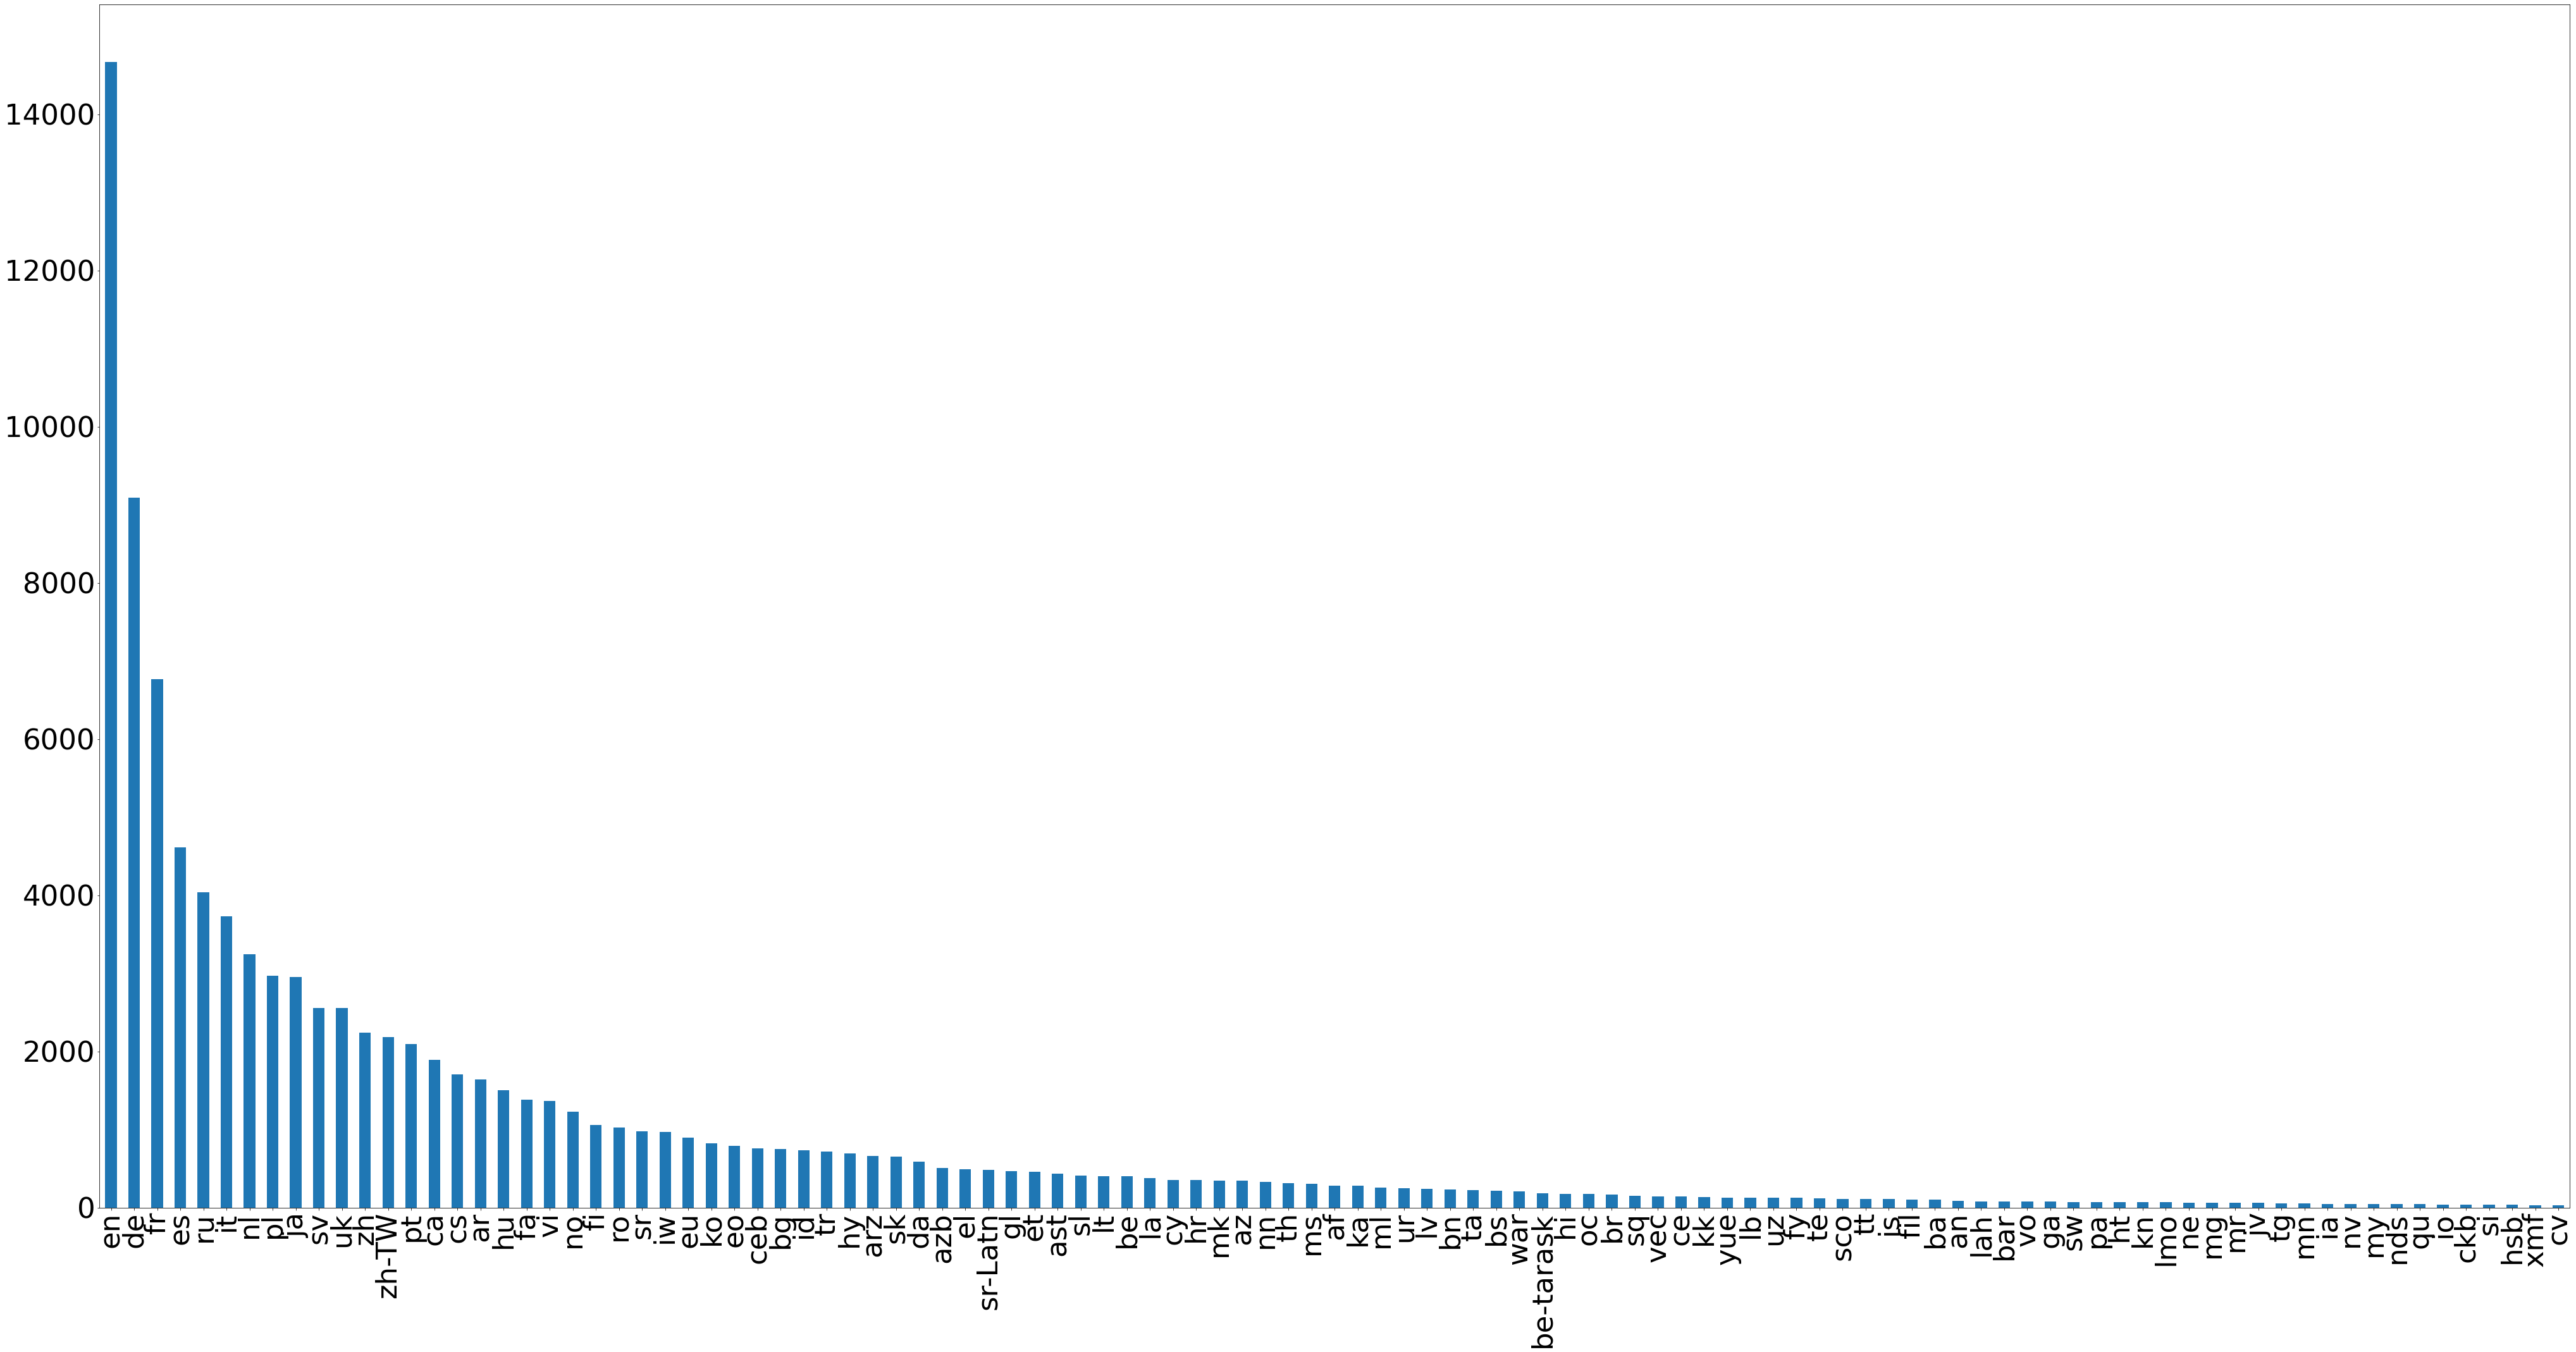

In [125]:
plt.figure(figsize=[70,35])
train["language"].value_counts().plot(kind="bar", fontsize=45)

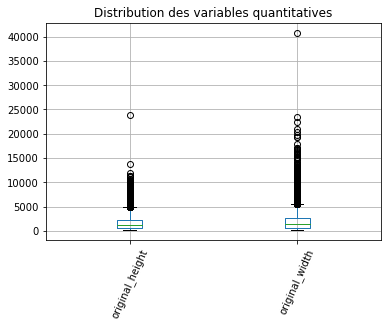

In [120]:
train.boxplot(rot=66, column=['original_height','original_width'])
plt.title("Distribution des variables quantitatives")
plt.show()